In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import re
import csv

In [7]:
training_essays = pd.read_csv('csvTraining.csv')

In [8]:
training_essays.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
score_map = {1:5, 2:10, 3:20, 4:20, 5:15, 6:15, 7:2.5, 8:1}

In [10]:
training_essays['score_map'] = training_essays['essay_set'].map(score_map)

In [11]:
training_essays["domain1_score"].head()

0     8
1     9
2     7
3    10
4     8
Name: domain1_score, dtype: int64

In [12]:
training_essays.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,score_map
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,12976.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188,11.987939
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417,6.684981
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,20.000000


In [13]:
txt_only = training_essays[['essay']]

In [14]:
txt_only.head()

,essay
0,"Dear local newspaper, I think effects computer..."
1,"Dear @CAPS1 @CAPS2, I believe that using compu..."
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl..."
3,"Dear Local Newspaper, @CAPS1 I have found that..."
4,"Dear @LOCATION1, I know having computers has a..."


In [15]:
txt_only.to_csv('txt_only.csv')

In [16]:
words = txt_only['essay'].tolist()

In [17]:
words[0:1]

["Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econo

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer()

In [20]:
token_words = vectorizer.fit_transform(words)

In [21]:
print(vectorizer.get_feature_names())

['00', '000', '00pm', '046', '101st', '102', '102nd', '10535', '10536', '11', '12', '13', '15', '185', '190', '1920s', '1929', '1930', '1930s', '1931', '1937', '1956', '1961', '1961ö', '1970', '21', '250', '27', '30', '30am', '30pm', '35', '41', '45', '46', '51', '55', '85th', '_________', 'aa', 'aamerica', 'aamous', 'aand', 'aare', 'aas', 'aase', 'aasked', 'ab', 'aback', 'abad', 'abadond', 'abait', 'abalt', 'abanded', 'abandon', 'abandond', 'abandone', 'abandoned', 'abandoness', 'abandoning', 'abandonment', 'abandonned', 'abandured', 'abanodoned', 'abanoned', 'abat', 'abbandon', 'abbanond', 'abbreviated', 'abc', 'abd', 'abdomens', 'abdominal', 'abducted', 'abduction', 'abe', 'abease', 'abeast', 'abel', 'abenefit', 'abese', 'abesity', 'abetter', 'abhor', 'abhors', 'abide', 'abided', 'abig', 'abiity', 'abile', 'abilit', 'abilitie', 'abilities', 'ability', 'abilitys', 'abiliy', 'abiliyt', 'abillity', 'abillty', 'abilty', 'abl', 'ablaze', 'able', 'abled', 'ables', 'ablities', 'ablitiy', '

In [22]:
token_words.shape

(12976, 39819)

In [23]:
first_essay_vectors = token_words[0]

In [24]:
first_essay = pd.DataFrame(first_essay_vectors.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"])

In [25]:
first_essay.sort_values(by=['tfidf'], ascending=False).head()

,tfidf
your,0.293779
computer,0.227800
you,0.224300
child,0.200466
chat,0.191268


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cvec = CountVectorizer()

In [28]:
word_count = cvec.fit_transform(words)

In [29]:
word_count

<12976x39819 sparse matrix of type '<class 'numpy.int64'>'
	with 1399350 stored elements in Compressed Sparse Row format>

In [30]:
def get_top_words(words, n=None):
    sum_words = word_count.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [31]:
get_top_words(word_count)

[('the', 151347),
 ('to', 98850),
 ('and', 79598),
 ('of', 53455),
 ('that', 50835),
 ('in', 43941),
 ('it', 39566),
 ('is', 38122),
 ('you', 32462),
 ('was', 31267),
 ('they', 25392),
 ('be', 25213),
 ('for', 24872),
 ('on', 24305),
 ('have', 20989),
 ('people', 20932),
 ('are', 20792),
 ('with', 19363),
 ('my', 18933),
 ('we', 18585),
 ('not', 17850),
 ('this', 17472),
 ('or', 16275),
 ('can', 15799),
 ('he', 15678),
 ('because', 14511),
 ('so', 14224),
 ('would', 14155),
 ('there', 14049),
 ('if', 13812),
 ('but', 13307),
 ('when', 12948),
 ('all', 12841),
 ('about', 12186),
 ('she', 11443),
 ('caps1', 11414),
 ('as', 11327),
 ('at', 11054),
 ('computers', 10696),
 ('had', 10642),
 ('what', 10230),
 ('like', 10194),
 ('do', 10147),
 ('their', 9939),
 ('from', 9857),
 ('one', 9845),
 ('time', 9563),
 ('computer', 9391),
 ('just', 9271),
 ('were', 9222),
 ('out', 9214),
 ('get', 9094),
 ('her', 9080),
 ('his', 8915),
 ('them', 8877),
 ('will', 8578),
 ('up', 8473),
 ('should', 8457),


In [32]:
from nltk.corpus import stopwords

In [33]:
stop = stopwords.words('english')

In [34]:
txt_only['stopwords'] = txt_only['essay'].apply(lambda x: len([x for x in x.split() if x in stop]))
txt_only[['essay','stopwords']].head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,essay,stopwords
0,"Dear local newspaper, I think effects computer...",157
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129
3,"Dear Local Newspaper, @CAPS1 I have found that...",207
4,"Dear @LOCATION1, I know having computers has a...",211


In [35]:
stop_count = txt_only[['essay','stopwords']]

In [36]:
stop_count.head()

,essay,stopwords
0,"Dear local newspaper, I think effects computer...",157
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129
3,"Dear Local Newspaper, @CAPS1 I have found that...",207
4,"Dear @LOCATION1, I know having computers has a...",211


In [37]:
des_stop = stop_count.sort_values('stopwords', ascending=False)

In [38]:
des_stop.head()

,essay,stopwords
2380,Censorhship should play a major part in which ...,529
2148,"Katherine Paterson once said, 'All of us can t...",516
2011,"Have you ever found or seen books, music, movi...",505
3059,"Dear @CAPS1, @CAPS2 I have found that ther...",489
1934,"Just because I agree with something, do you ha...",477


In [39]:
stop_count['word_count'] = stop_count['essay'].apply(lambda x: len(str(x).split(" ")))

In [40]:
total_count = stop_count[['essay','stopwords', 'word_count']]

In [41]:
total_count.sort_values('word_count', ascending=False).head()

,essay,stopwords,word_count
3022,Censorship is the most foul and terrifying par...,449,1119
1878,What are we hiding from? Is personal expressio...,474,1082
3222,In our society today there is an enormous amou...,475,1032
2380,Censorhship should play a major part in which ...,529,1004
2148,"Katherine Paterson once said, 'All of us can t...",516,1002


In [42]:
def avg_word(essay):
  wrdz = essay.split()
  return (sum(len(wrd) for wrd in wrdz)/len(wrdz))

In [43]:
total_count['avg_word'] = total_count['essay'].apply(lambda x: avg_word(x))

In [44]:
from spellchecker import SpellChecker

In [45]:
total_count.head()

,essay,stopwords,word_count,avg_word
0,"Dear local newspaper, I think effects computer...",157,338,4.550296
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882


In [46]:
def spell_count(essay):
    spell = SpellChecker()
    essay=essay.split()
    misspelled = spell.unknown(essay)
    return len(misspelled)

In [47]:
total_count['mispelled'] = total_count['essay'].apply(lambda x: spell_count(x))

In [48]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47


In [49]:
total_count.to_csv('total_count.csv')

In [50]:
import nltk

In [51]:
import string

In [52]:
from nltk import word_tokenize

In [53]:
from nltk import punkt

In [54]:
total_count['cleaned'] = total_count['essay'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [55]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled,cleaned
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44,Dear local newspaper I think effects computers...
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42,Dear CAPS1 CAPS2 I believe that using computer...
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27,Dear CAPS1 CAPS2 CAPS3 More and more people us...
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78,Dear Local Newspaper CAPS1 I have found that m...
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47,Dear LOCATION1 I know having computers has a p...


In [56]:
total_count['token'] = total_count.apply(lambda row: 
    nltk.word_tokenize(row['cleaned']), axis=1)

In [57]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled,cleaned,token
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44,Dear local newspaper I think effects computers...,"[Dear, local, newspaper, I, think, effects, co..."
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42,Dear CAPS1 CAPS2 I believe that using computer...,"[Dear, CAPS1, CAPS2, I, believe, that, using, ..."
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27,Dear CAPS1 CAPS2 CAPS3 More and more people us...,"[Dear, CAPS1, CAPS2, CAPS3, More, and, more, p..."
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78,Dear Local Newspaper CAPS1 I have found that m...,"[Dear, Local, Newspaper, CAPS1, I, have, found..."
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47,Dear LOCATION1 I know having computers has a p...,"[Dear, LOCATION1, I, know, having, computers, ..."


In [58]:
from nltk.collocations import *

In [59]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [60]:
all_words = total_count.token.sum()

In [61]:
from nltk.probability import FreqDist

In [62]:
stopwords_list = stopwords.words('english')

In [63]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
all_words = [word for word in all_words if word not in stopwords_list]

In [65]:
all_words

['Dear',
 'local',
 'newspaper',
 'I',
 'think',
 'effects',
 'computers',
 'people',
 'great',
 'learning',
 'skillsaffects',
 'give',
 'us',
 'time',
 'chat',
 'friendsnew',
 'people',
 'helps',
 'us',
 'learn',
 'globeastronomy',
 'keeps',
 'us',
 'troble',
 'Thing',
 'Dont',
 'think',
 'How',
 'would',
 'feel',
 'teenager',
 'always',
 'phone',
 'friends',
 'Do',
 'ever',
 'time',
 'chat',
 'friends',
 'buisness',
 'partner',
 'things',
 'Well',
 'theres',
 'new',
 'way',
 'chat',
 'computer',
 'plenty',
 'sites',
 'internet',
 'ORGANIZATION1',
 'ORGANIZATION2',
 'CAPS1',
 'facebook',
 'myspace',
 'ect',
 'Just',
 'think',
 'setting',
 'meeting',
 'boss',
 'computer',
 'teenager',
 'fun',
 'phone',
 'rushing',
 'get',
 'cause',
 'want',
 'use',
 'How',
 'learn',
 'countrysstates',
 'outside',
 'Well',
 'I',
 'computerinternet',
 'new',
 'way',
 'learn',
 'going',
 'time',
 'You',
 'might',
 'think',
 'child',
 'spends',
 'lot',
 'time',
 'computer',
 'ask',
 'question',
 'economy',

In [66]:
all_words_freqdist = FreqDist(all_words)

In [67]:
all_words_freqdist.most_common(10)

[('I', 45303),
 ('people', 19156),
 ('The', 18117),
 ('would', 13936),
 ('CAPS1', 10692),
 ('like', 9702),
 ('time', 9462),
 ('computer', 9174),
 ('get', 9034),
 ('computers', 8497)]

In [68]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [69]:
bigram_finder = BigramCollocationFinder.from_words(all_words)

In [70]:
bigram_scored = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [71]:
bigram_scored[:10]

[(('I', 'think'), 0.002370261798618714),
 (('Empire', 'State'), 0.001869944375721088),
 (('State', 'Building'), 0.001431125637328164),
 (('The', 'author'), 0.0012075522947016962),
 (('mooring', 'mast'), 0.0010301029654537547),
 (('I', 'believe'), 0.0010057597361706435),
 (('For', 'example'), 0.000907105596444351),
 (('I', 'would'), 0.0008161387922811464),
 (('time', 'I'), 0.0008046077889365148),
 (('dirigibles', 'dock'), 0.000772577224090316)]

In [72]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [73]:
trigram_finder = TrigramCollocationFinder.from_words(all_words)

In [74]:
trigram_scored = trigram_finder.score_ngrams(trigram_measures.raw_freq)

In [75]:
trigram_scored[:10]

[(('Empire', 'State', 'Building'), 0.0014183134113896845),
 (('allow', 'dirigibles', 'dock'), 0.0006015340078116141),
 (('builders', 'Empire', 'State'), 0.000577831389825427),
 (('author', 'concludes', 'story'), 0.00048302091788067844),
 (('attempting', 'allow', 'dirigibles'), 0.0004516309643314036),
 (('State', 'Building', 'faced'), 0.00043881873839292406),
 (('low', 'urban', 'areas'), 0.00038116372166976616),
 (('The', 'author', 'concludes'), 0.00036450782794974275),
 (('The', 'features', 'setting'), 0.00035169560201126323),
 (('mood', 'created', 'author'), 0.0003459301003389474)]

In [76]:
import re
prop_nouns = re.findall(r'\b[A-Z]*\d\b', total_count['cleaned'][1])
prop_nouns

['CAPS1',
 'CAPS2',
 'NUM1',
 'MONTH1',
 'LOCATION1',
 'LOCATION3',
 'LOCATION2',
 'NUM1',
 'NUM3',
 'NUM3']

In [77]:
len(prop_nouns)

10

In [78]:
def prop_count(cleaned):
    prop_nouns = re.findall(r'\b[A-Z]*\d\b', cleaned)
    return len(prop_nouns)

In [79]:
total_count['props'] = total_count['cleaned'].apply(lambda x: prop_count(x))

In [80]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled,cleaned,token,props
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44,Dear local newspaper I think effects computers...,"[Dear, local, newspaper, I, think, effects, co...",4
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42,Dear CAPS1 CAPS2 I believe that using computer...,"[Dear, CAPS1, CAPS2, I, believe, that, using, ...",10
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27,Dear CAPS1 CAPS2 CAPS3 More and more people us...,"[Dear, CAPS1, CAPS2, CAPS3, More, and, more, p...",7
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78,Dear Local Newspaper CAPS1 I have found that m...,"[Dear, Local, Newspaper, CAPS1, I, have, found...",40
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47,Dear LOCATION1 I know having computers has a p...,"[Dear, LOCATION1, I, know, having, computers, ...",4


In [81]:
total_count.describe()

,stopwords,word_count,avg_word,mispelled,props
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,99.846255,226.744143,4.438479,25.539843,4.399584
std,81.166996,180.022841,0.382159,20.879863,7.966941
min,0.000000,2.000000,2.928571,0.000000,0.000000
25%,44.000000,99.000000,4.207958,11.000000,0.000000
50%,71.000000,164.000000,4.451220,20.000000,1.000000
75%,138.000000,316.000000,4.691240,34.000000,5.000000
max,529.000000,1119.000000,17.120000,181.000000,113.000000


In [82]:
total_count.shape

(12976, 8)

In [83]:
total_count['grade'] = training_essays['score_map']*training_essays['domain1_score']

In [84]:
total_count.tail()

,essay,stopwords,word_count,avg_word,mispelled,cleaned,token,props,grade
12971,In most stories mothers and daughters are eith...,368,847,4.274556,100,In most stories mothers and daughters are eith...,"[In, most, stories, mothers, and, daughters, a...",28,35.0
12972,I never understood the meaning laughter is the...,243,547,4.155678,79,I never understood the meaning laughter is the...,"[I, never, understood, the, meaning, laughter,...",31,32.0
12973,"When you laugh, is @CAPS5 out of habit, or is ...",360,817,4.626683,115,When you laugh is CAPS5 out of habit or is CAP...,"[When, you, laugh, is, CAPS5, out, of, habit, ...",55,40.0
12974,"Trippin' on fences I am @NUM1 years young, and...",241,563,4.434164,83,Trippin on fences I am NUM1 years young and in...,"[Trippin, on, fences, I, am, NUM1, years, youn...",19,40.0
12975,Many people believe that laughter can improve ...,198,467,4.408994,52,Many people believe that laughter can improve ...,"[Many, people, believe, that, laughter, can, i...",7,40.0


In [85]:
total_count['percentage_grade'] = total_count['grade']/60 

In [86]:
total_count.describe()

,stopwords,word_count,avg_word,mispelled,props,grade,percentage_grade
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,99.846255,226.744143,4.438479,25.539843,4.399584,37.021424,0.617024
std,81.166996,180.022841,0.382159,20.879863,7.966941,13.959867,0.232664
min,0.000000,2.000000,2.928571,0.000000,0.000000,0.000000,0.000000
25%,44.000000,99.000000,4.207958,11.000000,0.000000,30.000000,0.500000
50%,71.000000,164.000000,4.451220,20.000000,1.000000,40.000000,0.666667
75%,138.000000,316.000000,4.691240,34.000000,5.000000,45.000000,0.750000
max,529.000000,1119.000000,17.120000,181.000000,113.000000,60.000000,1.000000


In [87]:
total_count.drop(['grade'], axis=1, inplace=True)

In [88]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled,cleaned,token,props,percentage_grade
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44,Dear local newspaper I think effects computers...,"[Dear, local, newspaper, I, think, effects, co...",4,0.666667
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42,Dear CAPS1 CAPS2 I believe that using computer...,"[Dear, CAPS1, CAPS2, I, believe, that, using, ...",10,0.750000
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27,Dear CAPS1 CAPS2 CAPS3 More and more people us...,"[Dear, CAPS1, CAPS2, CAPS3, More, and, more, p...",7,0.583333
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78,Dear Local Newspaper CAPS1 I have found that m...,"[Dear, Local, Newspaper, CAPS1, I, have, found...",40,0.833333
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47,Dear LOCATION1 I know having computers has a p...,"[Dear, LOCATION1, I, know, having, computers, ...",4,0.666667


In [89]:
def punc_count(essay):
    punctuation = re.findall('[.,?!\";:-]', essay)
    return len(punctuation)

In [90]:
total_count['punct'] = total_count['essay'].apply(lambda x: punc_count(x))

In [91]:
def avg_sent_length(essay):
    sents=essay.split('.')
    return sum(len(x.split()) for x in sents) / len(sents)

In [92]:
total_count['words_per_sent'] = total_count['essay'].apply(lambda x: avg_sent_length(x))

In [93]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled,cleaned,token,props,percentage_grade,punct,words_per_sent
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44,Dear local newspaper I think effects computers...,"[Dear, local, newspaper, I, think, effects, co...",4,0.666667,37,30.727273
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42,Dear CAPS1 CAPS2 I believe that using computer...,"[Dear, CAPS1, CAPS2, I, believe, that, using, ...",10,0.750000,33,22.052632
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27,Dear CAPS1 CAPS2 CAPS3 More and more people us...,"[Dear, CAPS1, CAPS2, CAPS3, More, and, more, p...",7,0.583333,23,18.600000
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78,Dear Local Newspaper CAPS1 I have found that m...,"[Dear, Local, Newspaper, CAPS1, I, have, found...",40,0.833333,46,21.000000
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47,Dear LOCATION1 I know having computers has a p...,"[Dear, LOCATION1, I, know, having, computers, ...",4,0.666667,45,15.000000


In [94]:
regress_test = total_count[['percentage_grade','stopwords', 'word_count', 'mispelled', 'avg_word', 'props', 'punct', 'words_per_sent']]

In [95]:
regress_test.head()

,percentage_grade,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent
0,0.666667,157,338,44,4.550296,4,37,30.727273
1,0.750000,175,419,42,4.463007,10,33,22.052632
2,0.583333,129,279,27,4.526882,7,23,18.600000
3,0.833333,207,524,78,5.041985,40,46,21.000000
4,0.666667,211,465,47,4.526882,4,45,15.000000


In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
X = regress_test.drop(['percentage_grade'],axis=1)
y = regress_test['percentage_grade']

In [98]:
X.head()

,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent
0,157,338,44,4.550296,4,37,30.727273
1,175,419,42,4.463007,10,33,22.052632
2,129,279,27,4.526882,7,23,18.600000
3,207,524,78,5.041985,40,46,21.000000
4,211,465,47,4.526882,4,45,15.000000


In [99]:
y.head()

0    0.666667
1    0.750000
2    0.583333
3    0.833333
4    0.666667
Name: percentage_grade, dtype: float64

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=33)

In [101]:
linmodel = LinearRegression()

In [102]:
linmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
regress_test.corr()

,percentage_grade,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent
percentage_grade,1.000000,0.292058,0.325970,0.395473,0.223768,0.200251,0.360593,0.023335
stopwords,0.292058,1.000000,0.986014,0.841487,-0.030438,0.567704,0.798910,0.213244
word_count,0.325970,0.986014,1.000000,0.891248,0.021871,0.617706,0.847215,0.172207
mispelled,0.395473,0.841487,0.891248,1.000000,0.144084,0.711223,0.923769,0.049398
avg_word,0.223768,-0.030438,0.021871,0.144084,1.000000,0.024357,0.219670,-0.133855
props,0.200251,0.567704,0.617706,0.711223,0.024357,1.000000,0.636369,0.052018
punct,0.360593,0.798910,0.847215,0.923769,0.219670,0.636369,1.000000,-0.010023
words_per_sent,0.023335,0.213244,0.172207,0.049398,-0.133855,0.052018,-0.010023,1.000000


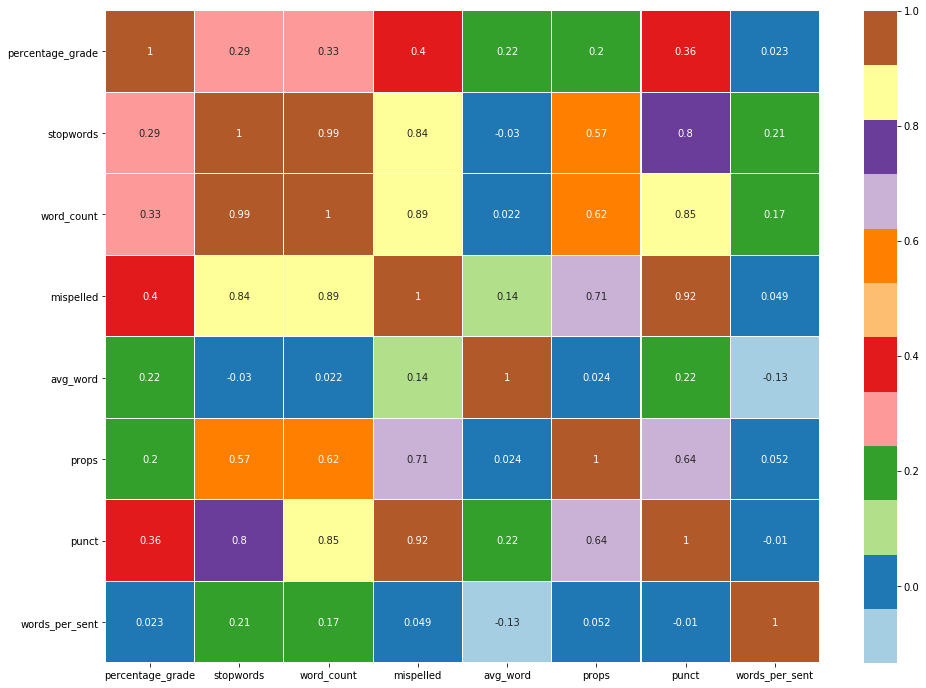

In [104]:
corrmat = regress_test.corr() 
f, ax = plt.subplots(figsize =(16, 12)) 
sns.heatmap(corrmat, ax = ax, cmap ="Paired", annot=True, linewidths = 0.1)

In [105]:
linmodel.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
linmodel.score(x_test, y_test)

0.18371922654948736

In [107]:
linmodel.coef_

array([-0.00165145,  0.00071648,  0.00614382,  0.07445085, -0.00423364,
       -0.00100569,  0.00127501])

In [108]:
regress_test.corr() > .4

,percentage_grade,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent
percentage_grade,True,False,False,False,False,False,False,False
stopwords,False,True,True,True,False,True,True,False
word_count,False,True,True,True,False,True,True,False
mispelled,False,True,True,True,False,True,True,False
avg_word,False,False,False,False,True,False,False,False
props,False,True,True,True,False,True,True,False
punct,False,True,True,True,False,True,True,False
words_per_sent,False,False,False,False,False,False,False,True


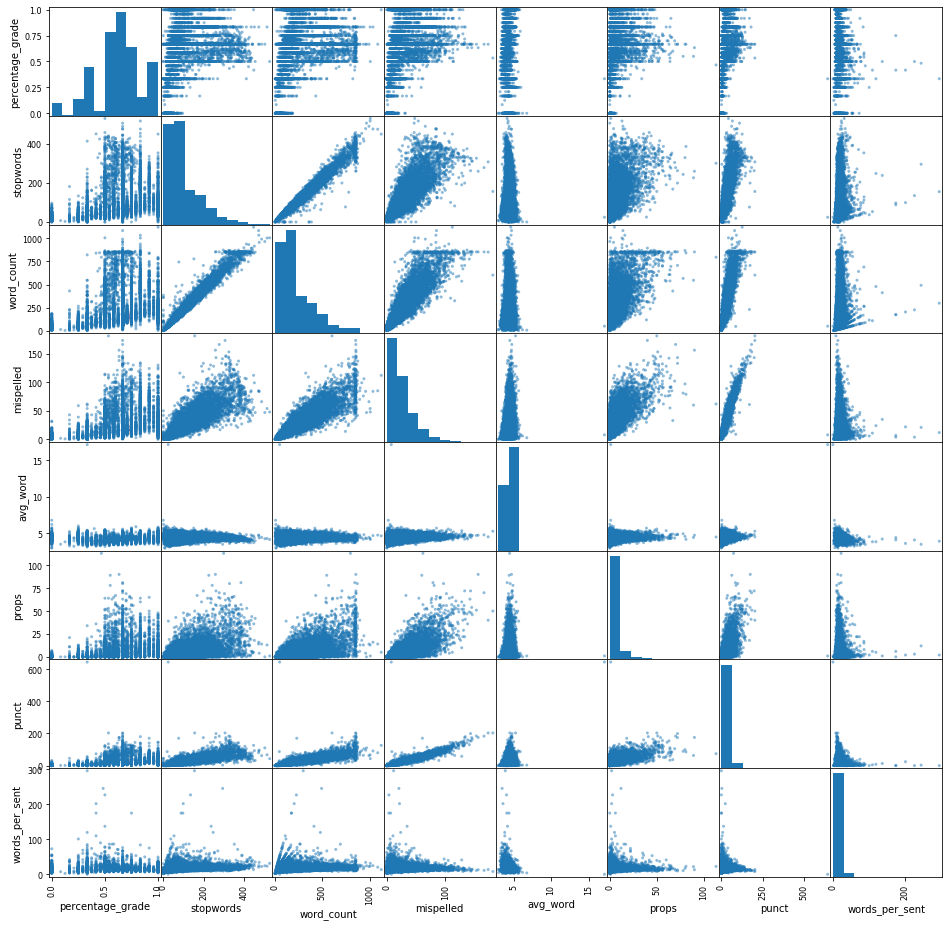

In [109]:
pd.plotting.scatter_matrix(regress_test,figsize=(16,16));

In [110]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [111]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       percentage_grade   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          1.680e+04
Date:                Fri, 03 Jan 2020   Prob (F-statistic):                        0.00
Time:                        16:45:18   Log-Likelihood:                          1973.7
No. Observations:               12976   AIC:                                     -3933.
Df Residuals:                   12969   BIC:                                     -3881.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
stopwords         -0.0012      0.000     -7.649      0.000      -0.002      -0.001
word_count         0.0006   8.51e-05      6.576      0.000       0.000       0.001
mispelled          0.0066      0.000     21.995      0.000       0.006       0.007
avg_word           0.1078      0.001     99.314      0.000       0.106       0.110
props             -0.0046      0.000    -13.835      0.000      -0.005      -0.004
punct             -0.0016      0.000     -7.077      0.000      -0.002      -0.001
words_per_sent     0.0013      0.000      5.310      0.000       0.001       0.002
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.235
Skew:                          -0.122   Prob(JB):                     1.35e-08
Kurtosis:                       3.084   Cond. No.                         194.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
y_pred = linmodel.predict(x_test)

In [113]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

NameError: name 'metrics' is not defined

In [ ]:
from sklearn import metrics

In [ ]:
regress_test.hist(figsize=(12,12));

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(linmodel, n_features_to_select=6)
selector = selector.fit(x_test,y_test)

In [ ]:
selector.ranking_

In [114]:
total_count.to_csv('total_count.csv')

In [115]:
feature_names = cvec.get_feature_names()

In [116]:
word_matrix = pd.DataFrame(token_words.toarray(), columns=feature_names)

In [117]:
word_matrix.head()

,00,000,00pm,046,101st,102,102nd,10535,10536,11,...,öand,öbut,öin,öitís,öour,öthen,öwhen,öyouödoing,öî,öîto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
get_top_words(token_words)

[('the', 151347),
 ('to', 98850),
 ('and', 79598),
 ('of', 53455),
 ('that', 50835),
 ('in', 43941),
 ('it', 39566),
 ('is', 38122),
 ('you', 32462),
 ('was', 31267),
 ('they', 25392),
 ('be', 25213),
 ('for', 24872),
 ('on', 24305),
 ('have', 20989),
 ('people', 20932),
 ('are', 20792),
 ('with', 19363),
 ('my', 18933),
 ('we', 18585),
 ('not', 17850),
 ('this', 17472),
 ('or', 16275),
 ('can', 15799),
 ('he', 15678),
 ('because', 14511),
 ('so', 14224),
 ('would', 14155),
 ('there', 14049),
 ('if', 13812),
 ('but', 13307),
 ('when', 12948),
 ('all', 12841),
 ('about', 12186),
 ('she', 11443),
 ('caps1', 11414),
 ('as', 11327),
 ('at', 11054),
 ('computers', 10696),
 ('had', 10642),
 ('what', 10230),
 ('like', 10194),
 ('do', 10147),
 ('their', 9939),
 ('from', 9857),
 ('one', 9845),
 ('time', 9563),
 ('computer', 9391),
 ('just', 9271),
 ('were', 9222),
 ('out', 9214),
 ('get', 9094),
 ('her', 9080),
 ('his', 8915),
 ('them', 8877),
 ('will', 8578),
 ('up', 8473),
 ('should', 8457),


In [119]:
thin_word_matrix = word_matrix[word_matrix.columns[word_matrix.sum() > 3.4]]

In [120]:
thin_word_matrix.shape

(12976, 3074)

In [121]:
thin_word_matrix.drop(['1937', 'caps1', 'caps2', 'caps3', 'caps4', 'caps5',
                                             'caps6', 'caps7', 'caps8', 'caps9', 'caps10',
                                             'caps11', 'caps12', 'caps13', 'caps14', 'caps15',
                                             'num1', 'num2', 'num3', 'num4', 'num5',
                                             'location1', 'location2', 'location3',
                                             'month1'],axis=1, inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [122]:
thin_word_matrix.drop(['organization1', 'organization2', 'person1',
                                             'person2', 'person3', 'person4',
                                             ],axis=1, inplace=True)

In [123]:
thin_word_matrix.shape

(12976, 3043)

In [124]:
thin_word_matrix.head()

,102,12,1930,1956,1961,1970,250,55,abandoned,abhor,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
big_df = regress_test.join(thin_word_matrix)

In [126]:
big_df.head()

,percentage_grade,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent,102,12,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,0.666667,157,338,44,4.550296,4,37,30.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750000,175,419,42,4.463007,10,33,22.052632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.583333,129,279,27,4.526882,7,23,18.600000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,207,524,78,5.041985,40,46,21.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.666667,211,465,47,4.526882,4,45,15.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
big_df.shape

(12976, 3051)

In [128]:
big_df.describe()

,percentage_grade,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent,102,12,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,...,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,0.617024,99.846255,226.744143,25.539843,4.438479,4.399584,23.160142,17.241437,0.000311,0.000359,...,0.001632,0.000369,0.000503,0.000433,0.000318,0.001727,0.000284,0.001805,0.000275,0.000311
std,0.232664,81.166996,180.022841,20.879863,0.382159,7.966941,21.885291,8.193127,0.006819,0.006976,...,0.013651,0.007955,0.008612,0.007495,0.006514,0.014735,0.006730,0.015343,0.005769,0.008748
min,0.000000,0.000000,2.000000,0.000000,2.928571,0.000000,0.000000,0.077760,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,44.000000,99.000000,11.000000,4.207958,0.000000,8.000000,13.186779,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.666667,71.000000,164.000000,20.000000,4.451220,1.000000,17.000000,16.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,138.000000,316.000000,34.000000,4.691240,5.000000,31.000000,19.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,529.000000,1119.000000,181.000000,17.120000,113.000000,644.000000,296.000000,0.226900,0.240184,...,0.244438,0.290679,0.232066,0.313067,0.276484,0.234707,0.286272,0.324081,0.264134,0.479573


In [129]:
X = big_df.drop(['percentage_grade'],axis=1)
y = big_df['percentage_grade']

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=33)

In [131]:
linmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
linmodel.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       percentage_grade   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              83.61
Date:                Fri, 03 Jan 2020   Prob (F-statistic):                        0.00
Time:                        16:50:36   Log-Likelihood:                          8299.7
No. Observations:               12976   AIC:                                 -1.050e+04
Df Residuals:                    9926   BIC:                                  1.229e+04
Df Model:                        3050                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
stopwords         -0.0009      0.000     -5.341      0.000      -0.001      -0.001
word_count         0.0004   8.27e-05      5.135      0.000       0.000       0.001
mispelled          0.0033      0.000     11.984      0.000       0.003       0.004
avg_word           0.0206      0.002      9.187      0.000       0.016       0.025
props             -0.0012      0.000     -3.669      0.000      -0.002      -0.001
punct             -0.0006      0.000     -3.492      0.000      -0.001      -0.000
words_per_sent     0.0003      0.000      1.381      0.167      -0.000       0.001
102                0.1384      0.277      0.499      0.618      -0.405       0.682
12                 0.1695      0.394      0.430      0.667      -0.602       0.941
1930              -0.5783      0.253     -2.285      0.022      -1.074      -0.082
1956              -0.4433      0.222     -1.998      0.046      -0.878      -0.008
1961               0.1533      0.241      0.636      0.525      -0.319       0.626
1970              -0.3422      0.225     -1.519      0.129      -0.784       0.099
250               -0.1832      0.218     -0.840      0.401      -0.611       0.244
55                 0.3760      0.288      1.307      0.191      -0.188       0.940
abandoned          0.3216      0.112      2.878      0.004       0.103       0.541
abhor              0.2332      0.440      0.529      0.597      -0.630       1.097
ability            0.2383      0.124      1.919      0.055      -0.005       0.482
able               0.1286      0.075      1.708      0.088      -0.019       0.276
about             -0.0268      0.058     -0.461      0.645      -0.141       0.087
above              0.0015      0.115      0.013      0.990      -0.224       0.227
absolutely        -0.1218      0.262     -0.465      0.642      -0.635       0.391
abuse             -0.2244      0.287     -0.781      0.435      -0.787       0.338
accept            -0.0852      0.162     -0.526      0.599      -0.403       0.232
acceptable         0.0826      0.283      0.292      0.771      -0.473       0.638
accepting          0.3370      0.229      1.472      0.141      -0.112       0.786
access             0.0868      0.149      0.584      0.559      -0.205       0.378
accident          -0.1292      0.136     -0.953      0.341      -0.395       0.137
accidents          0.2566      0.234      1.098      0.272      -0.202       0.715
accommodate        0.2200      0.180      1.219      0.223      -0.134       0.574
accomplish         0.0813      0.199      0.408      0.683      -0.309       0.471
according          0.1500      0.140      1.074      0.283      -0.124       0.424
account            0.1908      0.209      0.913      0.361      -0.219       0.

In [134]:
y_pred = linmodel.predict(x_test)

In [135]:
linmodel.score(x_test, y_test)

0.9035080963609239

In [139]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)

In [140]:
df1.round(5)

,Actual,Predicted
6854,0.00000,-0.01826
3016,0.33333,0.30184
1426,0.50000,0.49471
9658,0.75000,0.65711
8229,0.50000,0.60726
582,0.91667,0.82696
9435,0.75000,0.73124
10764,0.41667,0.49079
335,0.83333,0.77515
12007,0.58333,0.63278


In [141]:
low_grades = regress_test.percentage_grade < .15

In [142]:
low_grades.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: percentage_grade, dtype: bool

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linmodel, X, y, cv=5,  scoring='neg_mean_squared_error'))

In [144]:
cv_5_results

-4304186517877533.0

In [145]:
from sklearn import svm

In [146]:
test_mse = mean_squared_error(y_test, y_pred)

In [147]:
test_mse

0.00507858092348911

In [148]:
import statsmodels.api as sm
import scipy.stats as stats

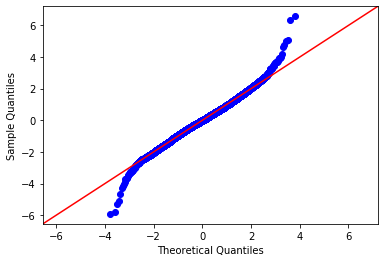

In [149]:
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [150]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [151]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import *
from keras.layers import LeakyReLU

In [152]:
regress_test.rename(columns = {'props':'PropNouns', 'mispelled': 'MISSPELLINGS'}, inplace = True) 
   

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [153]:
word_matrix.head()

,00,000,00pm,046,101st,102,102nd,10535,10536,11,...,öand,öbut,öin,öitís,öour,öthen,öwhen,öyouödoing,öî,öîto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
essay_data = regress_test.join(word_matrix)

In [155]:
essay_data.head()

,percentage_grade,stopwords,word_count,MISSPELLINGS,avg_word,PropNouns,punct,words_per_sent,00,000,...,öand,öbut,öin,öitís,öour,öthen,öwhen,öyouödoing,öî,öîto
0,0.666667,157,338,44,4.550296,4,37,30.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750000,175,419,42,4.463007,10,33,22.052632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.583333,129,279,27,4.526882,7,23,18.600000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,207,524,78,5.041985,40,46,21.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.666667,211,465,47,4.526882,4,45,15.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
thin_essay_data = essay_data[essay_data.columns[essay_data.sum() > 3.49]]

In [157]:
thin_essay_data.shape

(12976, 3027)

In [158]:
thin_essay_data.to_csv('thin_essay_data.csv')

In [159]:
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            ModelCheckpoint(filepath='class_model.h5', monitor='val_loss', save_best_only=True),TQDMNotebookCallback()]

In [160]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [161]:
X = thin_essay_data.drop(['percentage_grade'],axis=1)
y = thin_essay_data['percentage_grade']

In [203]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25, random_state=24)

In [204]:
X.shape

(12976, 3026)

In [205]:
y.shape

(12976,)

In [206]:
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            ModelCheckpoint(filepath='bnn_model.h5', monitor='val_loss', save_best_only=True),TQDMNotebookCallback()]

In [207]:
from keras import initializers
from keras import regularizers
from keras import constraints

In [208]:
nnmodel = Sequential()
nnmodel.add(Dense(1512, input_dim=3026, kernel_initializer='normal',activation='relu', kernel_regularizer=regularizers.l2(0.1)))
nnmodel.add(Dense(756, kernel_initializer='normal', activation='relu'))
nnmodel.add(Dense(378, kernel_initializer='normal', activation='relu'))
nnmodel.add(Dense(1, kernel_initializer='normal', activation='linear'))

In [209]:
nnmodel.compile(loss='mean_squared_error', optimizer='adam')

In [210]:
history = nnmodel.fit(X_train,y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2, callbacks=callbacks)

Train on 9732 samples, validate on 3244 samples


Epoch 1/100


 - 22s - loss: 151.4273 - val_loss: 1.6990
Epoch 2/100


 - 24s - loss: 1.5617 - val_loss: 1.5010
Epoch 3/100


 - 24s - loss: 1.5237 - val_loss: 1.2352
Epoch 4/100


 - 24s - loss: 1.4121 - val_loss: 1.9450
Epoch 5/100


 - 24s - loss: 1.3315 - val_loss: 1.0621
Epoch 6/100


 - 24s - loss: 1.0106 - val_loss: 1.0617
Epoch 7/100


 - 25s - loss: 0.9253 - val_loss: 1.0376
Epoch 8/100


 - 24s - loss: 0.8223 - val_loss: 0.7869
Epoch 9/100


 - 24s - loss: 0.7086 - val_loss: 0.6673
Epoch 10/100


 - 24s - loss: 0.7562 - val_loss: 0.7090
Epoch 11/100


 - 24s - loss: 0.5978 - val_loss: 0.5509
Epoch 12/100


 - 23s - loss: 0.5258 - val_loss: 0.5001
Epoch 13/100


 - 24s - loss: 0.4991 - val_loss: 0.5796
Epoch 14/100


 - 24s - loss: 0.4321 - val_loss: 0.3956
Epoch 15/100


 - 23s - loss: 0.3905 - val_loss: 0.3545
Epoch 16/100


 - 23s - loss: 0.3634 - val_loss: 0.3224
Epoch 17/100


 - 24s - loss: 0.3047 - val_loss: 0.2856
Epoch 18/100


 - 22s - loss: 0.3027 - val_loss: 26.6542
Epoch 19/100


 - 22s - loss: 0.6053 - val_loss: 0.2581
Epoch 20/100


 - 23s - loss: 0.2211 - val_loss: 0.2013
Epoch 21/100


 - 23s - loss: 0.1920 - val_loss: 0.1788
Epoch 22/100


 - 22s - loss: 0.1700 - val_loss: 0.1620
Epoch 23/100


 - 23s - loss: 0.1511 - val_loss: 0.1379
Epoch 24/100


 - 24s - loss: 0.1389 - val_loss: 0.1249
Epoch 25/100


 - 22s - loss: 0.1169 - val_loss: 0.1079
Epoch 26/100


 - 24s - loss: 0.1008 - val_loss: 0.0985
Epoch 27/100


 - 23s - loss: 0.0892 - val_loss: 0.0860
Epoch 28/100


 - 23s - loss: 0.0782 - val_loss: 0.0728
Epoch 29/100


 - 24s - loss: 0.0698 - val_loss: 0.0641
Epoch 30/100


 - 24s - loss: 0.0610 - val_loss: 0.0563
Epoch 31/100


 - 24s - loss: 0.0526 - val_loss: 0.0550
Epoch 32/100


 - 26s - loss: 0.0473 - val_loss: 0.0456
Epoch 33/100


 - 25s - loss: 0.0427 - val_loss: 0.0411
Epoch 34/100


 - 23s - loss: 0.0398 - val_loss: 0.0385
Epoch 35/100


 - 24s - loss: 0.0377 - val_loss: 0.0358
Epoch 36/100


 - 23s - loss: 0.0353 - val_loss: 0.0331
Epoch 37/100


 - 24s - loss: 0.0339 - val_loss: 0.0331
Epoch 38/100


 - 25s - loss: 0.0337 - val_loss: 0.0339
Epoch 39/100


 - 24s - loss: 0.0328 - val_loss: 0.0313
Epoch 40/100


 - 23s - loss: 0.0321 - val_loss: 0.0305
Epoch 41/100


 - 23s - loss: 0.0329 - val_loss: 0.0317
Epoch 42/100


 - 23s - loss: 0.0319 - val_loss: 0.0306
Epoch 43/100


 - 23s - loss: 0.0323 - val_loss: 0.0316
Epoch 44/100


 - 22s - loss: 0.0322 - val_loss: 0.0299
Epoch 45/100


 - 25s - loss: 0.0314 - val_loss: 0.0318
Epoch 46/100


 - 25s - loss: 0.0315 - val_loss: 0.0307
Epoch 47/100


 - 24s - loss: 0.0316 - val_loss: 0.0316
Epoch 48/100


 - 23s - loss: 0.0317 - val_loss: 0.0320
Epoch 49/100


 - 23s - loss: 0.0315 - val_loss: 0.0327
Epoch 50/100


 - 22s - loss: 0.0322 - val_loss: 0.0302
Epoch 51/100


 - 22s - loss: 0.0314 - val_loss: 0.0301
Epoch 52/100


 - 22s - loss: 0.0316 - val_loss: 0.0308
Epoch 53/100


 - 23s - loss: 0.0312 - val_loss: 0.0295
Epoch 54/100


 - 23s - loss: 0.0311 - val_loss: 0.0308
Epoch 55/100


 - 23s - loss: 0.0314 - val_loss: 0.0295
Epoch 56/100


 - 23s - loss: 0.0311 - val_loss: 0.0301
Epoch 57/100


 - 22s - loss: 0.0312 - val_loss: 0.0291
Epoch 58/100


 - 23s - loss: 0.0309 - val_loss: 0.0315
Epoch 59/100


 - 26s - loss: 0.0310 - val_loss: 0.0304
Epoch 60/100


 - 25s - loss: 0.0306 - val_loss: 0.0304
Epoch 61/100


 - 24s - loss: 0.0311 - val_loss: 0.0340
Epoch 62/100


 - 23s - loss: 0.0310 - val_loss: 0.0294
Epoch 63/100


 - 23s - loss: 0.0308 - val_loss: 0.0312
Epoch 64/100


 - 24s - loss: 0.0306 - val_loss: 0.0289
Epoch 65/100


 - 26s - loss: 0.0305 - val_loss: 0.0290
Epoch 66/100


 - 24s - loss: 0.0310 - val_loss: 0.0287
Epoch 67/100


 - 23s - loss: 0.0308 - val_loss: 0.0292
Epoch 68/100


 - 25s - loss: 0.0310 - val_loss: 0.0296
Epoch 69/100


 - 24s - loss: 0.0306 - val_loss: 0.0302
Epoch 70/100


 - 23s - loss: 0.0306 - val_loss: 0.0320
Epoch 71/100


 - 24s - loss: 0.0307 - val_loss: 0.0291
Epoch 72/100


 - 23s - loss: 0.0306 - val_loss: 0.0294
Epoch 73/100


 - 23s - loss: 0.0303 - val_loss: 0.0285
Epoch 74/100


 - 25s - loss: 0.0303 - val_loss: 0.0295
Epoch 75/100


 - 25s - loss: 0.0305 - val_loss: 0.0306
Epoch 76/100


 - 24s - loss: 0.0307 - val_loss: 0.0293
Epoch 77/100


 - 23s - loss: 0.0304 - val_loss: 0.0287
Epoch 78/100


 - 23s - loss: 0.0309 - val_loss: 0.0293
Epoch 79/100


 - 23s - loss: 0.0301 - val_loss: 0.0309
Epoch 80/100


 - 23s - loss: 0.0301 - val_loss: 0.0292
Epoch 81/100


 - 23s - loss: 0.0303 - val_loss: 0.0288
Epoch 82/100


 - 22s - loss: 0.0304 - val_loss: 0.0288
Epoch 83/100


 - 22s - loss: 0.0301 - val_loss: 0.0293


In [211]:
for layer in best_model.layers:
    if len(layer.weights) > 0:
        print(layer.name, layer.weights[0].shape)

dense_1 (3026, 1512)
dense_2 (1512, 756)
dense_3 (756, 378)
dense_4 (378, 1)


In [212]:
from numpy import loadtxt
from keras.models import load_model
 

best_model = load_model('bnn_model.h5')

best_model.summary()


X = thin_essay_data.drop(['percentage_grade'],axis=1)
y = thin_essay_data['percentage_grade']

score = best_model.evaluate(X, y, verbose=2)
print("%s: %.2f%%" % (best_model.metrics_names, score*100))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1512)              4576824   
_________________________________________________________________
dense_6 (Dense)              (None, 756)               1143828   
_________________________________________________________________
dense_7 (Dense)              (None, 378)               286146    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 379       
Total params: 6,007,177
Trainable params: 6,007,177
Non-trainable params: 0
_________________________________________________________________
['loss']: 2.91%


In [213]:
B_Input_Hidden = best_model.layers[0].get_weights()[1]
B_Output_Hidden = best_model.layers[1].get_weights()[1]

In [214]:
B_Input_Hidden

array([-0.00849254, -0.00035954, -0.00094752, ..., -0.00077473,
       -0.00116509, -0.00114815], dtype=float32)

In [215]:
B_Output_Hidden

array([-3.96493301e-02, -4.03606221e-02, -1.77151747e-02, -4.74926978e-02,
       -9.21106860e-02, -1.89371213e-01,  5.19588729e-03, -2.64146011e-02,
       -1.35803998e-01, -9.28818882e-02, -5.16846776e-02, -8.33818913e-02,
       -3.46347652e-02, -4.79472354e-02, -6.10774243e-03, -5.70123307e-02,
       -2.80098598e-02, -4.96786721e-02, -6.82016239e-02, -5.13188057e-02,
       -7.92519674e-02, -7.04745650e-02, -2.18519960e-02, -4.99248132e-02,
       -1.08023353e-01, -5.06390408e-02, -6.84018433e-02, -5.24796769e-02,
       -6.14678450e-02, -1.22249573e-01, -5.28176576e-02, -6.03092685e-02,
       -5.69402687e-02, -1.12133227e-01, -3.95464972e-02, -9.23089832e-02,
       -7.18374327e-02, -6.26668483e-02, -5.25594912e-02, -6.51185736e-02,
       -3.23221199e-02, -6.53747991e-02, -6.35028929e-02, -7.09834993e-02,
       -3.90753336e-02, -1.56581923e-01, -3.36505659e-02, -5.43000586e-02,
       -7.63399228e-02, -6.92939013e-02, -7.69808888e-02, -5.43097183e-02,
       -4.36953939e-02, -

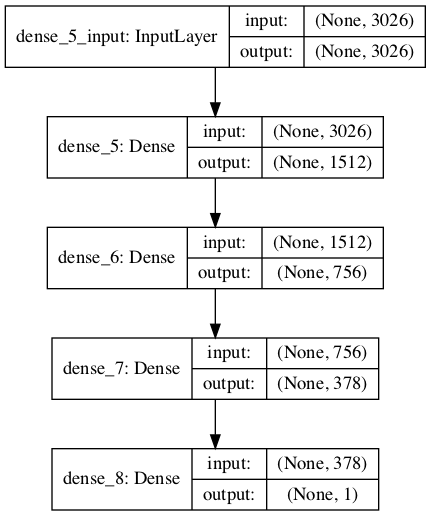

In [216]:
from keras.utils import plot_model
plot_model(best_model,expand_nested=True,show_shapes=True)

In [217]:
best_model.evaluate(X_test, y_test)

3244/3244 [==============================] - 2s 468us/step


0.028493907709138608

In [218]:
best_model.evaluate(X_train, y_train)

9732/9732 [==============================] - 5s 492us/step


0.029324218409539395

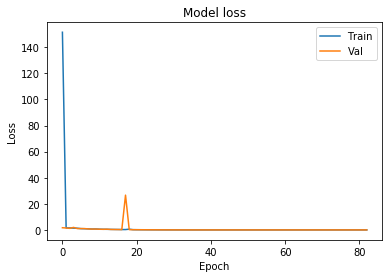

In [219]:
plt.plot(nnmodel.history.history['loss'])
plt.plot(nnmodel.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

